# Importing relevant libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import seaborn as sns
from matplotlib import pyplot as plt 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from tensorflow import keras
from keras.optimizers import RMSprop
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing the dataset 

In [2]:
data = pd.read_excel('myData.xlsx')
data.head(10)

,Years,"Agiculture, Hunting, Fishing & forestry",Mining & Quarrying,Manufacturing,Electricity & Water,Construction,Distribution & Repairs,Transport & Communication,Financial & Insurance Activities,Real Estate Activities,Public Administration & Defence,Education,Human Health & Social Work Activities,Domestic Services,Other Service Activities,Less FISIM,Net taxes on production,Net taxes on products,Gross Domestic Product at Basic Prices,GDP at Market Prices
0,2009,1038,561,1066,310,137,1857,1080,826,110,407,301,69,21,96,-22,113,1155,8511,9666
1,2010,1157,802,1109,399,182,2116,1649,709,126,682,657,130,23,109,-36,130,1334,10708,12042
2,2011,1222,1006,1293,474,289,2149,1932,730,193,1052,948,206,27,127,-50,151,1551,12551,14102
3,2012,1377,1064,2404,492,376,2463,1348,1137,303,1403,1326,279,41,189,-67,171,1871,15244,17115
4,2013,1364,1187,2466,492,399,2937,1992,1301,341,1439,1524,314,43,182,-77,185,1940,17151,19091
5,2014,1705,1157,2455,586,426,2964,2026,950,385,1580,1684,348,45,183,-86,184,1841,17655,19496
6,2015,1654,1089,2373,574,426,3044,2086,984,417,1630,1834,395,47,188,-93,186,2044,17919,19963
7,2016,1618,1219,2383,501,442,3409,2092,1082,420,1751,1890,418,49,189,-100,195,1878,18671,20549
8,2017,1838,1267,2428,525,497,3732,2256,1136,427,1774,2135,455,52,203,-107,210,2027,20014,22041


In [3]:
data.tail(10)

,Years,"Agiculture, Hunting, Fishing & forestry",Mining & Quarrying,Manufacturing,Electricity & Water,Construction,Distribution & Repairs,Transport & Communication,Financial & Insurance Activities,Real Estate Activities,Public Administration & Defence,Education,Human Health & Social Work Activities,Domestic Services,Other Service Activities,Less FISIM,Net taxes on production,Net taxes on products,Gross Domestic Product at Basic Prices,GDP at Market Prices
0,2009,1038,561,1066,310,137,1857,1080,826,110,407,301,69,21,96,-22,113,1155,8511,9666
1,2010,1157,802,1109,399,182,2116,1649,709,126,682,657,130,23,109,-36,130,1334,10708,12042
2,2011,1222,1006,1293,474,289,2149,1932,730,193,1052,948,206,27,127,-50,151,1551,12551,14102
3,2012,1377,1064,2404,492,376,2463,1348,1137,303,1403,1326,279,41,189,-67,171,1871,15244,17115
4,2013,1364,1187,2466,492,399,2937,1992,1301,341,1439,1524,314,43,182,-77,185,1940,17151,19091
5,2014,1705,1157,2455,586,426,2964,2026,950,385,1580,1684,348,45,183,-86,184,1841,17655,19496
6,2015,1654,1089,2373,574,426,3044,2086,984,417,1630,1834,395,47,188,-93,186,2044,17919,19963
7,2016,1618,1219,2383,501,442,3409,2092,1082,420,1751,1890,418,49,189,-100,195,1878,18671,20549
8,2017,1838,1267,2428,525,497,3732,2256,1136,427,1774,2135,455,52,203,-107,210,2027,20014,22041


In [4]:
data.index = data['Years']
data.drop('Years', axis=1, inplace=True)
data.head()

,"Agiculture, Hunting, Fishing & forestry",Mining & Quarrying,Manufacturing,Electricity & Water,Construction,Distribution & Repairs,Transport & Communication,Financial & Insurance Activities,Real Estate Activities,Public Administration & Defence,Education,Human Health & Social Work Activities,Domestic Services,Other Service Activities,Less FISIM,Net taxes on production,Net taxes on products,Gross Domestic Product at Basic Prices,GDP at Market Prices
Years,,,,,,,,,,,,,,,,,,,
2009,1038,561,1066,310,137,1857,1080,826,110,407,301,69,21,96,-22,113,1155,8511,9666
2010,1157,802,1109,399,182,2116,1649,709,126,682,657,130,23,109,-36,130,1334,10708,12042
2011,1222,1006,1293,474,289,2149,1932,730,193,1052,948,206,27,127,-50,151,1551,12551,14102
2012,1377,1064,2404,492,376,2463,1348,1137,303,1403,1326,279,41,189,-67,171,1871,15244,17115
2013,1364,1187,2466,492,399,2937,1992,1301,341,1439,1524,314,43,182,-77,185,1940,17151,19091


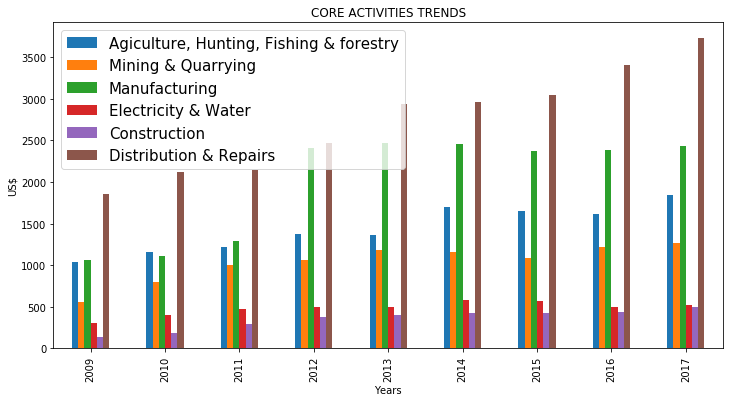

In [5]:
df_plot = data[['Agiculture, Hunting, Fishing & forestry', 'Mining & Quarrying', 'Manufacturing', 'Electricity & Water', 'Construction','Distribution & Repairs']]
df_plot.plot(kind='bar', figsize=(12, 6), fontsize=10)
plt.title('CORE ACTIVITIES TRENDS')
plt.xlabel('Years');
plt.legend(fontsize=15);
plt.ylabel('US$');
plt.legend(fontsize=15);
plt.show()

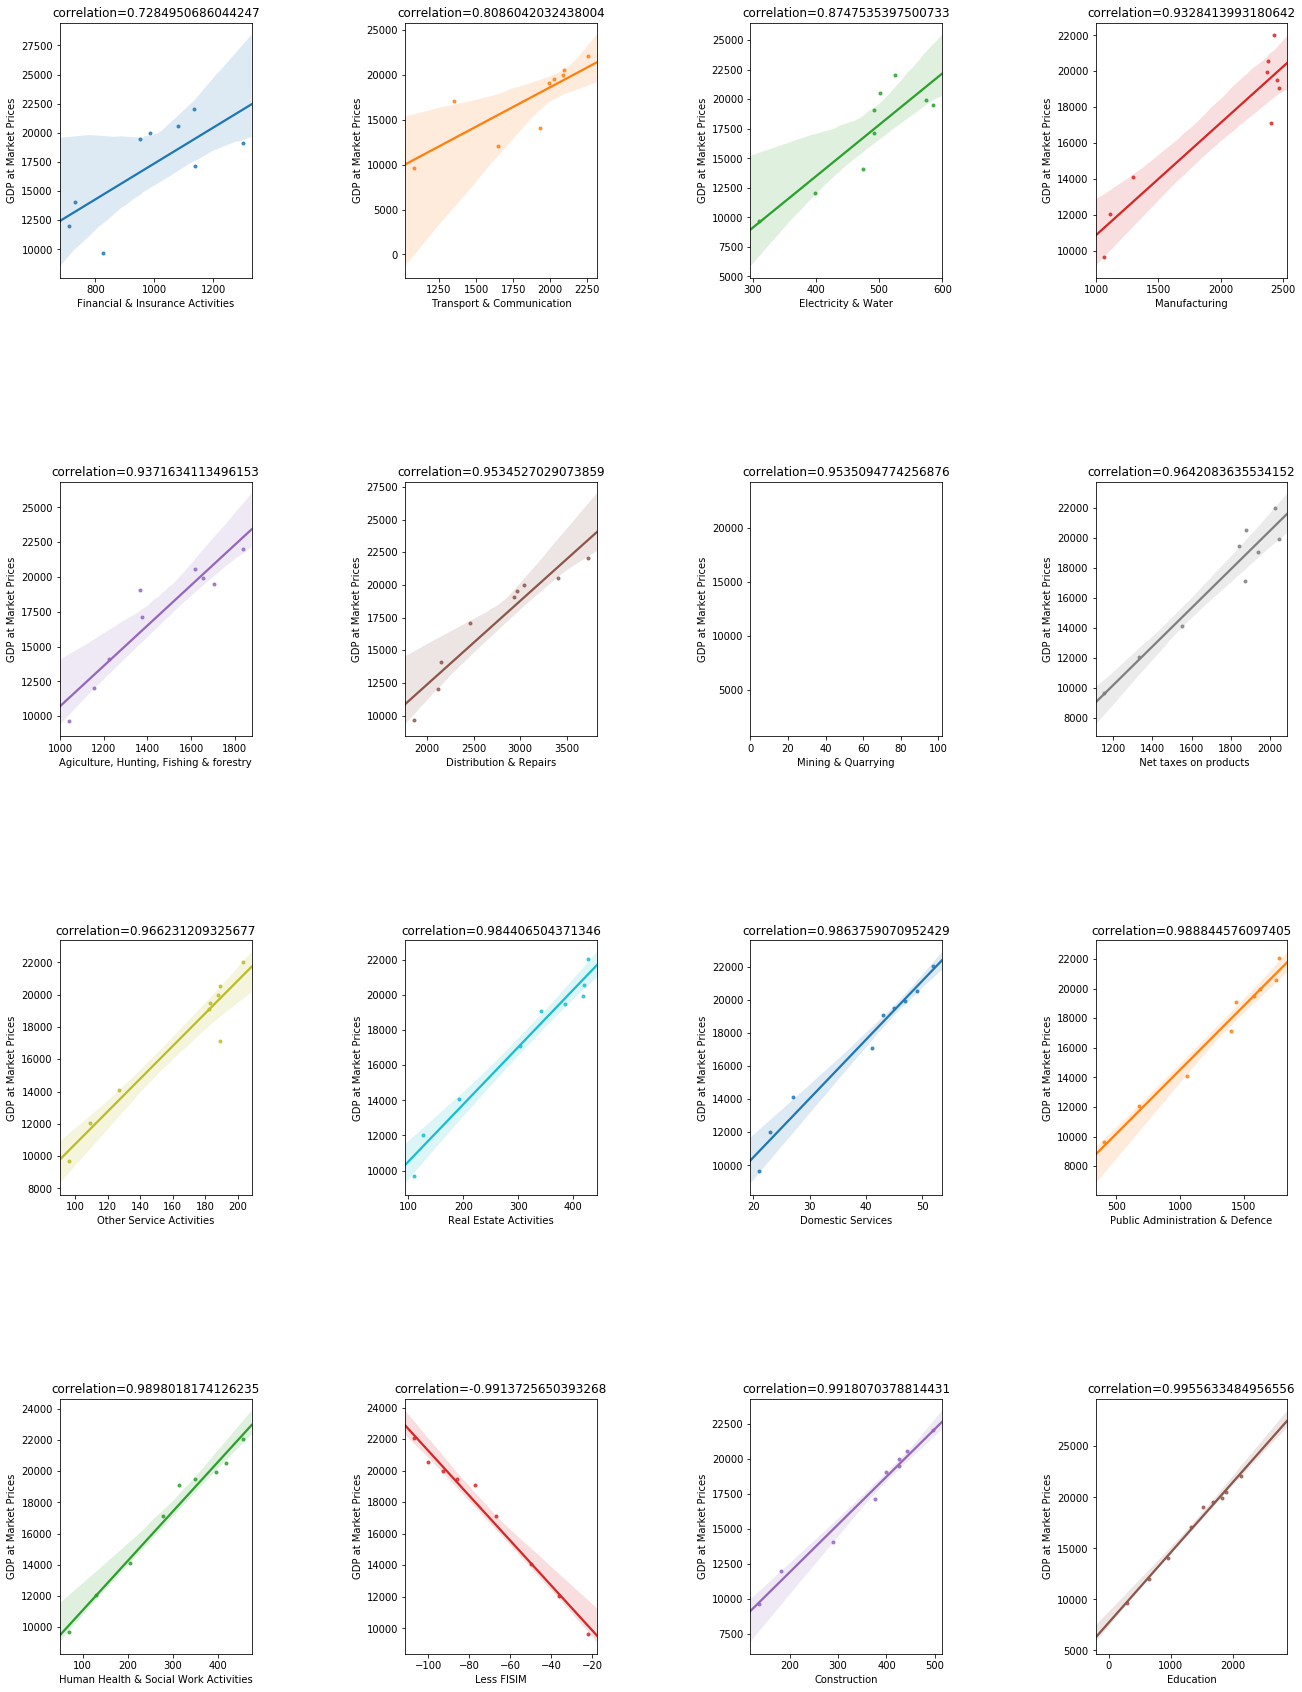

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(22,30))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)

corr_to_gdp = pd.Series()
for col in data.columns.values[0:]:
    if ((col!=
         'GDP at Market Prices') & (col!= 'Gross Domestic Product at Basic Prices')):
        corr_to_gdp[col] = data['GDP at Market Prices'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=True)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(4):
    for j in range(4):
        sns.regplot(x=corr_to_gdp.index.values[i*4+j], y='GDP at Market Prices', data=data,
                   ax=axes[i,j], fit_reg=True, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*4+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

# Exploratory data analysis

In [7]:
print('number of missing data:')
print(data.isnull().sum())
data.describe()

number of missing data:
Agiculture, Hunting, Fishing & forestry    0
Mining & Quarrying                         0
Manufacturing                              0
Electricity & Water                        0
Construction                               0
Distribution & Repairs                     0
Transport & Communication                  0
Financial & Insurance Activities           0
Real Estate Activities                     0
Public Administration & Defence            0
Education                                  0
Human Health & Social Work Activities      0
Domestic Services                          0
Other Service Activities                   0
Less FISIM                                 0
  Net taxes on production                  0
  Net taxes on products                    0
Gross Domestic Product at Basic Prices     0
GDP at Market Prices                       0
dtype: int64


,"Agiculture, Hunting, Fishing & forestry",Mining & Quarrying,Manufacturing,Electricity & Water,Construction,Distribution & Repairs,Transport & Communication,Financial & Insurance Activities,Real Estate Activities,Public Administration & Defence,Education,Human Health & Social Work Activities,Domestic Services,Other Service Activities,Less FISIM,Net taxes on production,Net taxes on products,Gross Domestic Product at Basic Prices,GDP at Market Prices
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1441.444444,1039.111111,1997.444444,483.666667,352.666667,2741.222222,1829.00000,983.888889,302.444444,1302.000000,1366.555556,290.444444,38.666667,162.888889,-70.888889,169.444444,1737.888889,15380.444444,17118.333333
std,275.011868,226.130186,634.667848,85.295076,123.466595,633.254249,390.23967,200.893905,127.918051,485.559986,614.845125,132.377407,11.789826,40.371538,29.506120,31.839877,317.004118,3938.522950,4243.283988
min,1038.000000,561.000000,1066.000000,310.000000,137.000000,1857.000000,1080.00000,709.000000,110.000000,407.000000,301.000000,69.000000,21.000000,96.000000,-107.000000,113.000000,1155.000000,8511.000000,9666.000000
25%,1222.000000,1006.000000,1293.000000,474.000000,289.000000,2149.000000,1649.00000,826.000000,193.000000,1052.000000,948.000000,206.000000,27.000000,127.000000,-93.000000,151.000000,1551.000000,12551.000000,14102.000000
50%,1377.000000,1089.000000,2383.000000,492.000000,399.000000,2937.000000,1992.00000,984.000000,341.000000,1439.000000,1524.000000,314.000000,43.000000,183.000000,-77.000000,184.000000,1871.000000,17151.000000,19091.000000
75%,1654.000000,1187.000000,2428.000000,525.000000,426.000000,3044.000000,2086.00000,1136.000000,417.000000,1630.000000,1834.000000,395.000000,47.000000,189.000000,-50.000000,186.000000,1940.000000,17919.000000,19963.000000
max,1838.000000,1267.000000,2466.000000,586.000000,497.000000,3732.000000,2256.00000,1301.000000,427.000000,1774.000000,2135.000000,455.000000,52.000000,203.000000,-22.000000,210.000000,2044.000000,20014.000000,22041.000000


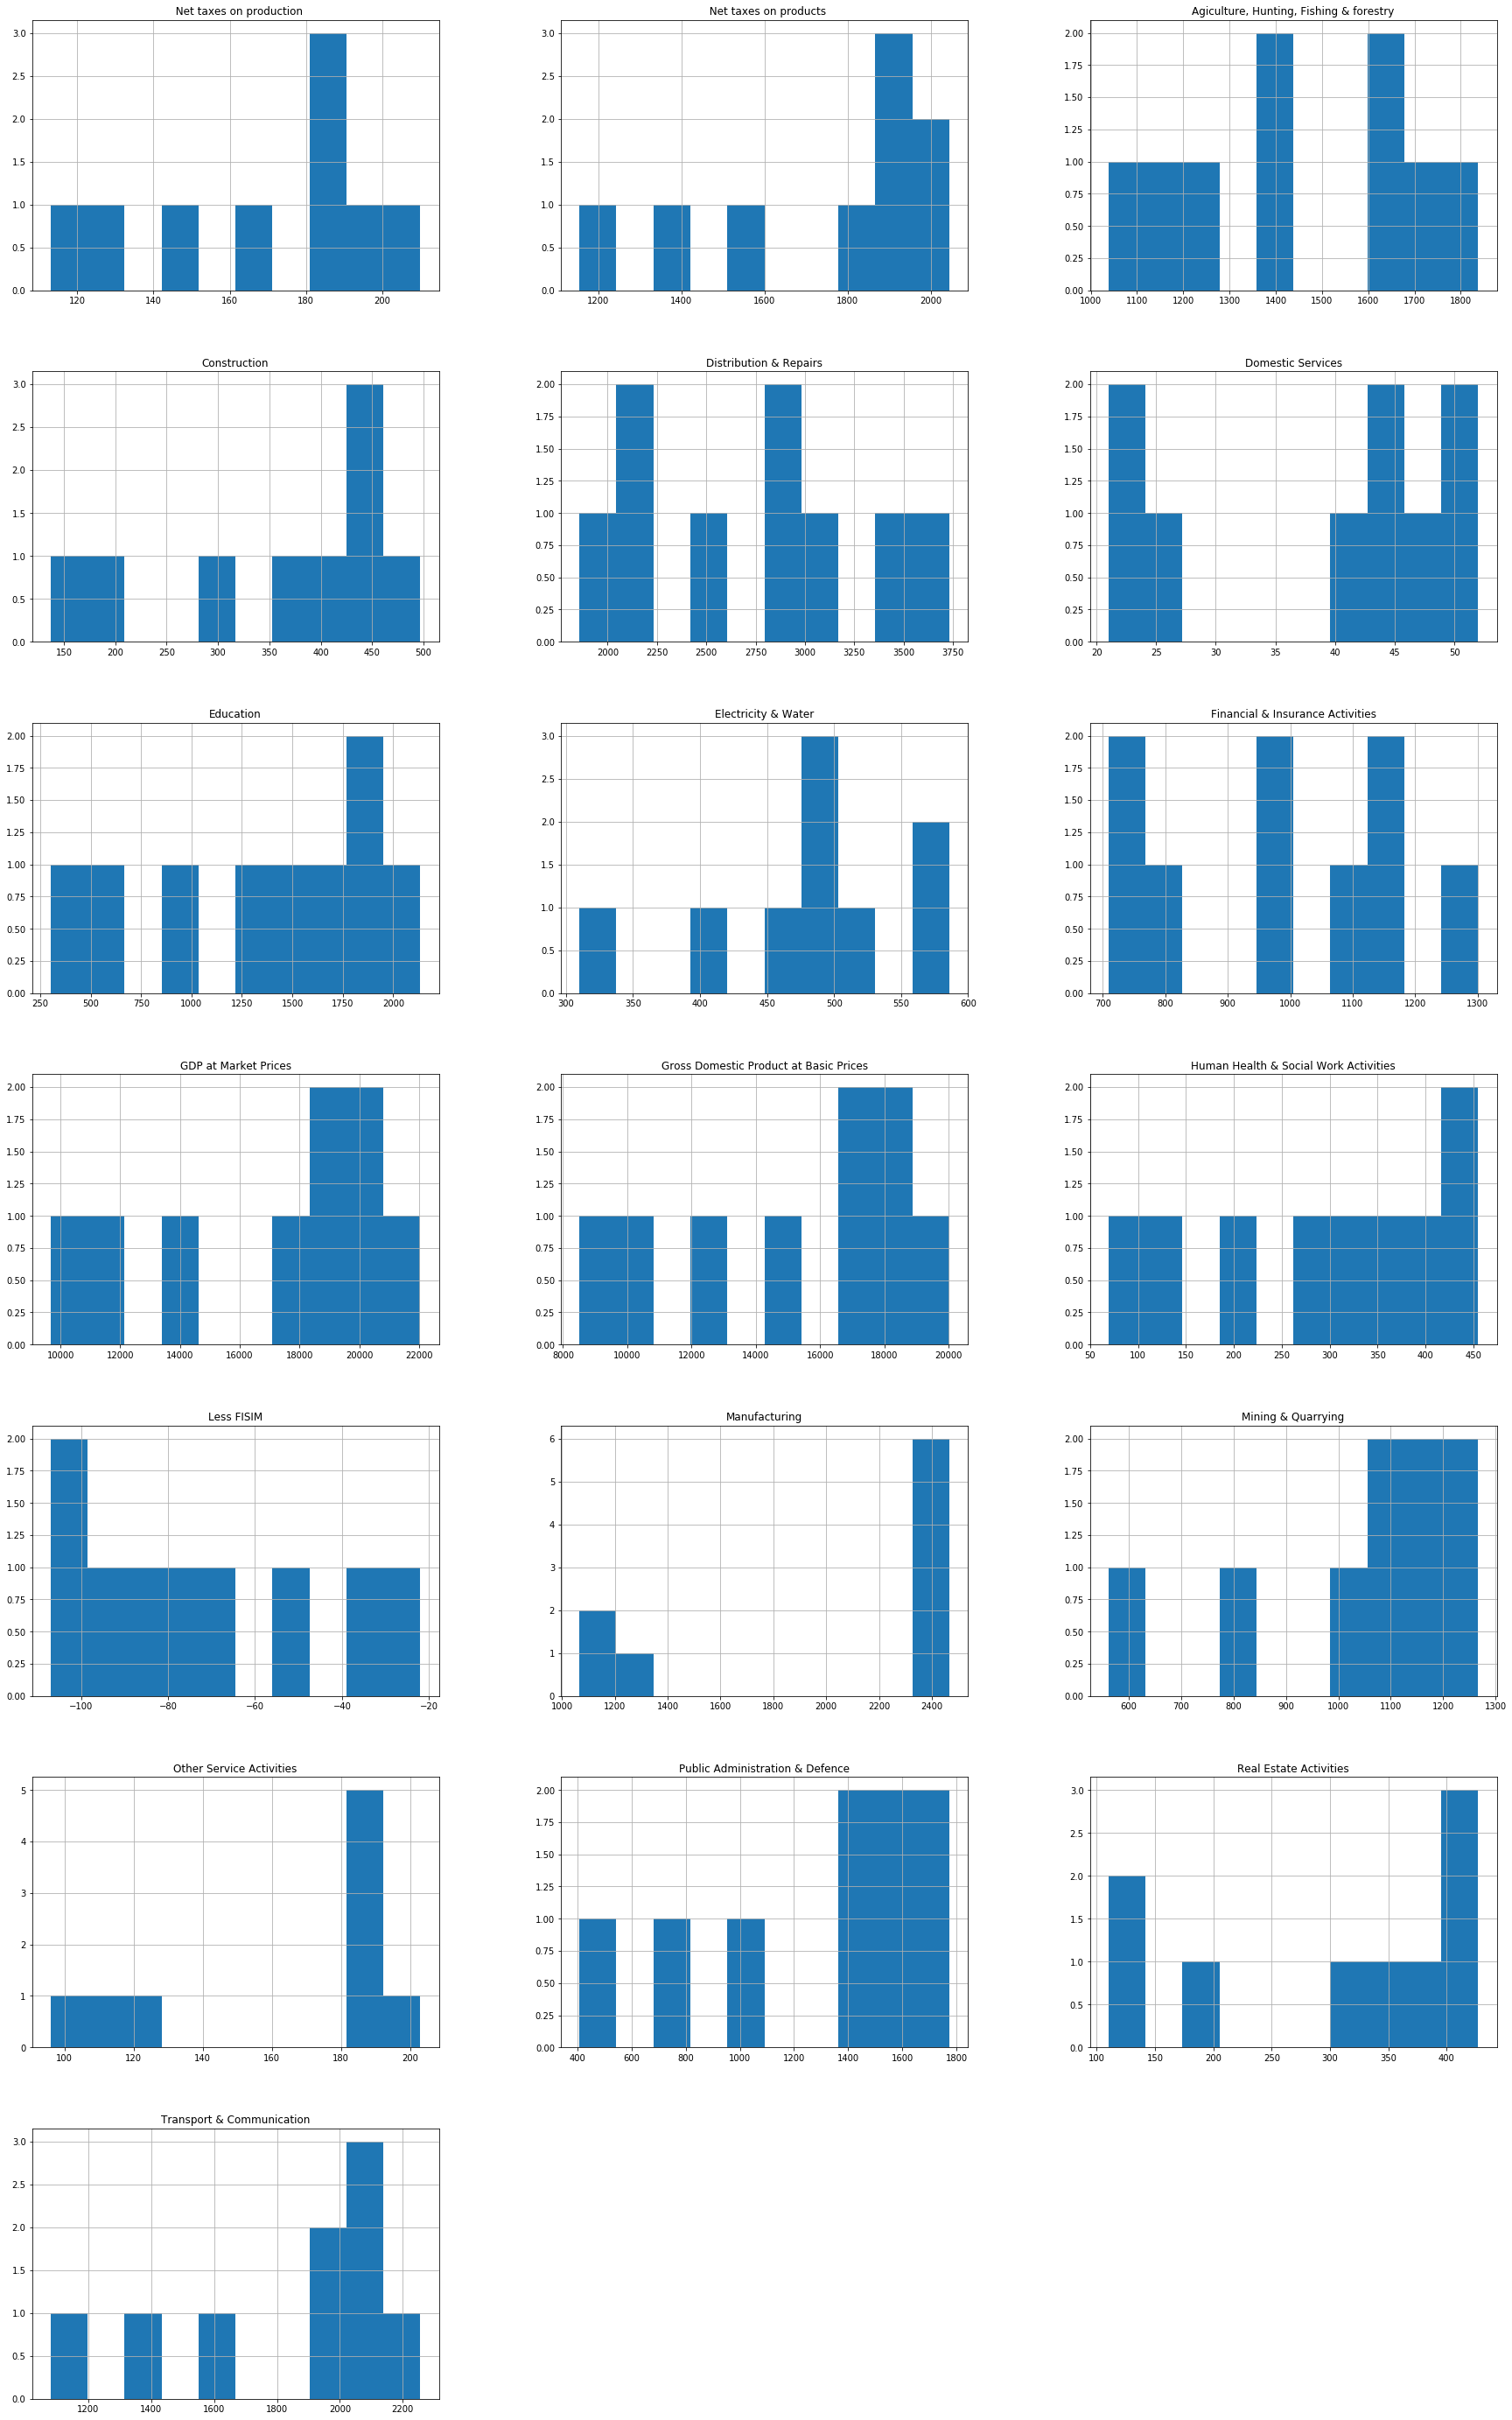

In [8]:
data.hist(figsize=(30,50), sharex = False, layout=(7,3))
plt.show()

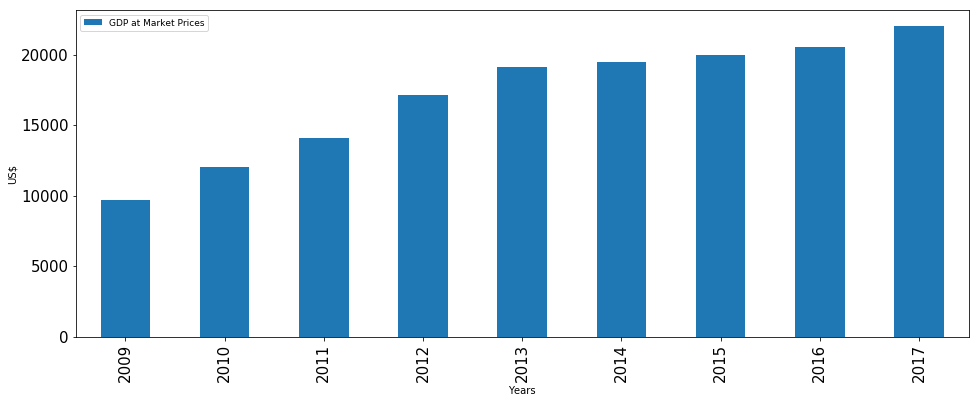

In [9]:
df_plot = data[[ 'GDP at Market Prices']].sort_values(by='GDP at Market Prices', ascending=True).head(18)
df_plot.plot(kind='bar', figsize=(16, 6), fontsize=15)
plt.xlabel('Years'); plt.legend(fontsize=9);
plt.ylabel('US$') ; plt.legend(fontsize=9);

* since the range of the data is varying that much,,,, there is need for scaling and this model is going to make use of Standard scaling. 

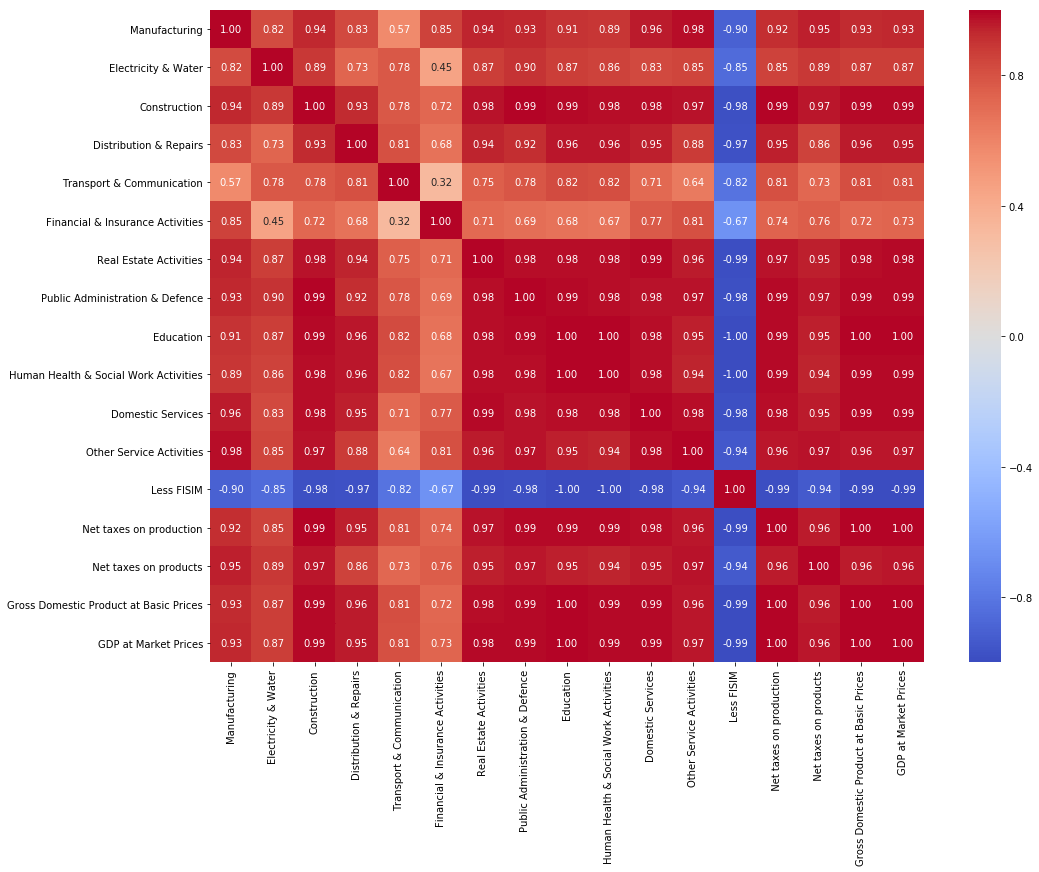

In [10]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

**the relationships from the matrix are strong and this is an advantage to the model as great accuracy is being garanteed (that is minimization of loss)**

In [11]:
corr_to_gdp = pd.Series()
for col in data.columns.values[1:]:
    if ((col!='Gross Domestic Product at Basic Prices')&(col!='GDP at Market Prices')):
        corr_to_gdp[col] = data['GDP at Market Prices'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

  Net taxes on production                0.995710
Education                                0.995563
Construction                             0.991807
Less FISIM                              -0.991373
Human Health & Social Work Activities    0.989802
Public Administration & Defence          0.988845
Domestic Services                        0.986376
Real Estate Activities                   0.984407
Other Service Activities                 0.966231
  Net taxes on products                  0.964208
Mining & Quarrying                       0.953509
Distribution & Repairs                   0.953453
Manufacturing                            0.932841
Electricity & Water                      0.874754
Transport & Communication                0.808604
Financial & Insurance Activities         0.728495
dtype: float64


In [12]:
data.shape

(9, 19)

# defining  input values(X-features) and output values (Y-values)

In [13]:
X = data.iloc[:,:17].values
X

array([[1038,  561, 1066,  310,  137, 1857, 1080,  826,  110,  407,  301,
          69,   21,   96,  -22,  113, 1155],
       [1157,  802, 1109,  399,  182, 2116, 1649,  709,  126,  682,  657,
         130,   23,  109,  -36,  130, 1334],
       [1222, 1006, 1293,  474,  289, 2149, 1932,  730,  193, 1052,  948,
         206,   27,  127,  -50,  151, 1551],
       [1377, 1064, 2404,  492,  376, 2463, 1348, 1137,  303, 1403, 1326,
         279,   41,  189,  -67,  171, 1871],
       [1364, 1187, 2466,  492,  399, 2937, 1992, 1301,  341, 1439, 1524,
         314,   43,  182,  -77,  185, 1940],
       [1705, 1157, 2455,  586,  426, 2964, 2026,  950,  385, 1580, 1684,
         348,   45,  183,  -86,  184, 1841],
       [1654, 1089, 2373,  574,  426, 3044, 2086,  984,  417, 1630, 1834,
         395,   47,  188,  -93,  186, 2044],
       [1618, 1219, 2383,  501,  442, 3409, 2092, 1082,  420, 1751, 1890,
         418,   49,  189, -100,  195, 1878],
       [1838, 1267, 2428,  525,  497, 3732, 2256

In [14]:
X.shape

(9, 17)

In [15]:
Y = data.iloc[:,18].values
Y

array([ 9666, 12042, 14102, 17115, 19091, 19496, 19963, 20549, 22041],
      dtype=int64)

In [16]:
y = np.reshape(Y,(-1,1))
y

array([[ 9666],
       [12042],
       [14102],
       [17115],
       [19091],
       [19496],
       [19963],
       [20549],
       [22041]], dtype=int64)

In [17]:
y.shape

(9, 1)

**Scaling our data**

In [18]:
Ssc = StandardScaler()
X_scaled = Ssc.fit_transform(X)
y_scaled = Ssc.fit_transform(y)
print(X_scaled)
y_scaled

[[-1.55599631e+00 -2.24257284e+00 -1.55663475e+00 -2.15957738e+00
  -1.85272012e+00 -1.48101540e+00 -2.03576041e+00 -8.33606455e-01
  -1.59569471e+00 -1.95504342e+00 -1.83817403e+00 -1.77430053e+00
  -1.58936438e+00 -1.75733656e+00  1.75741499e+00 -1.88029539e+00
  -1.95028075e+00]
 [-1.09703954e+00 -1.11216603e+00 -1.48477292e+00 -1.05284578e+00
  -1.46614019e+00 -1.04720704e+00 -4.89234810e-01 -1.45133172e+00
  -1.46302725e+00 -1.35433175e+00 -1.22404373e+00 -1.28554439e+00
  -1.40943634e+00 -1.41579440e+00  1.25415524e+00 -1.31398595e+00
  -1.35136685e+00]
 [-8.46348863e-01 -1.55307159e-01 -1.17727118e+00 -1.20206802e-01
  -5.46939014e-01 -9.91934163e-01  2.79951030e-01 -1.34045795e+00
  -9.07482269e-01 -5.46101513e-01 -7.22043958e-01 -6.76602309e-01
  -1.04958025e+00 -9.42889882e-01  7.50895494e-01 -6.14427233e-01
  -6.25309229e-01]
 [-2.48548021e-01  1.16740952e-01  6.79437735e-01  1.03626554e-01
   2.00448853e-01 -4.66004342e-01 -1.30734413e+00  8.08381207e-01
   4.60650898e-03  

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.86280088e+00],
       [-1.26889093e+00],
       [-7.53969011e-01],
       [-8.33206996e-04],
       [ 4.93091900e-01],
       [ 5.94326550e-01],
       [ 7.11058851e-01],
       [ 8.57536641e-01],
       [ 1.23048009e+00]])

# spliting data for training and testing the model ( 70% for training and 30% testing)

In [19]:
np.random.seed(9)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled, test_size = 0.3, random_state = 42)

# Defining the model

In [21]:
model = Sequential()
model.add(Dense(200,input_dim = 17, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(units = 1))

# Structure of the model(summary)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3600      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 44,001
Trainable params: 44,001
Non-trainable params: 0
_________________________________________________________________


# compiling the model

In [23]:
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# fitting the model

In [24]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 30,  validation_split = 0.2, verbose=1)

Train on 4 samples, validate on 2 samples
Epoch 1/30
4/4 [==============================] - 1s 211ms/step - loss: 1.4267 - mean_squared_error: 1.4267 - val_loss: 0.0795 - val_mean_squared_error: 0.0795
Epoch 2/30
4/4 [==============================] - 0s 903us/step - loss: 0.5742 - mean_squared_error: 0.5742 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 3/30
4/4 [==============================] - 0s 1ms/step - loss: 0.2583 - mean_squared_error: 0.2583 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 4/30
4/4 [==============================] - 0s 883us/step - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 5/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6/30
4/4 [==============================] - 0s 976us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Ep

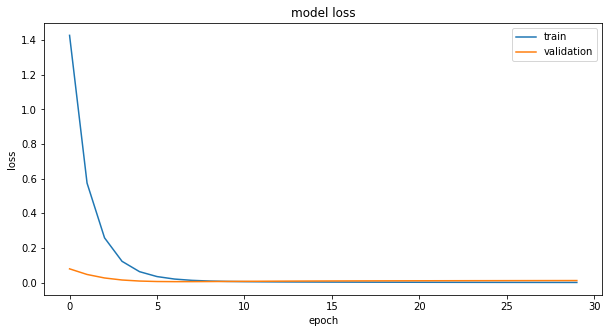

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Model Evaluation

In [26]:
print("Model evaluation")
loss = model.evaluate(X_test,y_test)
print("model","%s: %.2f%%"%(model.metrics_names[0],loss[1]*100))
print("model accuracy:", "%.2f%%" % (100-loss[1]*100))

Model evaluation
3/3 [==============================] - 0s 975us/step
model loss: 0.22%
model accuracy: 99.78%


# Save the trained model to a file so that we can deploy it to a Web App

In [27]:
joblib.dump(model, 'forecasting_model.pkl')

['forecasting_model.pkl']